In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="#009e84"> ch01. NLTK 자연어처리 패키지 </font></b>

- 자연어처리 : 텍스트 전처리, 단어의 빈도수 측정, 문서유사도 측정, 연관분석, 딥러닝, 워드임베딩, 텍스트 분류, 어휘 데이터베이스 사용, 감성분석, 분류분석

# 1. NLTK 패키지

- 텍스트 전처리 : 토큰화(문장, 어절, 형태소 나누기), 정규표현식을 이용하여 불용어 처리, 어간추출
- 품사태깅 : 단어별 품사를 식별

    - pip istall nltk==3.7

In [1]:
import nltk

In [3]:
# 말뭉치 다운로드 받을 폴더
# c:/nltk_data, d:nltk_data, e:/nltk_data
# c:/Users/내컴퓨터이름/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/share/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/lib/nltk_data
# c:/Users/내컴퓨터이름/AppData/Roaming/nltk_data

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to C:\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
# 말뭉치 리스트

nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
# 오스틴 소설 엠마 내용 데이터 셋

emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma[:50])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I





In [9]:
type(emma), len(emma)

(str, 887071)

In [3]:
# sent_tokenize() : 문장단위로 쪼갠 list 반환

from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)
print('문장수 :', len(sent_tokens))
print(sent_tokens[0]) # 첫번째 문장 / print에서 \n 적용하고싶지 않으면 앞에 '%r' % 붙여주기

문장수 : 7456
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.


In [4]:
# word_tokenize() : 단어 단위로 쪼갠 list 반환

from nltk.tokenize import word_tokenize
print(word_tokenize(sent_tokens[0]))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']


In [5]:
# RegexpTokenizer 클래스 : 토큰화할때, 정규표현식

from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('\d+')  # \d : [0-9]
digits = ret.tokenize(emma)   # ret이라는 객체가 숫자들만 가져오게 만든것
print(digits)
ret1 = RegexpTokenizer('\w+') # \w : [a-zA-Z0-9_]
words = ret1.tokenize(sent_tokens[0])
print(words)
ret1 = RegexpTokenizer('[a-zA-Z]+') # 해당 정규표현식에 맞는 단어만 추출
words = ret1.tokenize(sent_tokens[0])
print(words)

['1816', '8', '23', '28', '28', '24', '7', '10', '000', '10', '000', '26']
['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']
['Emma', 'by', 'Jane', 'Austen', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


# 2. 형태소(의미가 있는 가장 작은 단위) 분석

- cf. 자연어 처리의 기본은 형태소 분석과 품사태깅 - 어간추출(Stemming), 품사태깅(PosTagging)

In [6]:
from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer

In [7]:
# 어간 추출 1 : PosterStemmer . 이걸 그나마 제일 많이 쓰는데 어간추출은 잘 안씀

words = ['sending', 'cooking', 'files', 'lives', 'crying', 'dying']

pst = PorterStemmer() # 클래스는 객체를 만들고 사용
# pst.stem(words[0], words[1])
[pst.stem(word) for word in words]

['send', 'cook', 'file', 'live', 'cri', 'die']

In [8]:
# 어간 추출 2 : LanscasterStemmer

lst = LancasterStemmer()
[lst.stem(word) for word in words]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [9]:
# 어간 추출 3 : RegexpStemmer

rst = RegexpStemmer('ing')
[rst.stem(word) for word in words]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

# 3. 품사 태깅 

- 형태소 추출보다 더 중요

In [10]:
print('품사태깅할 내용 :', word_tokenize(sent_tokens[0]))

품사태깅할 내용 : ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']


In [11]:
from nltk.tag import pos_tag

tagged_list = pos_tag(word_tokenize(sent_tokens[0]))
print('품사태깅 결과 :', tagged_list)

품사태깅 결과 : [('[', 'NNS'), ('Emma', 'NNP'), ('by', 'IN'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), (']', 'NNP'), ('VOLUME', 'NNP'), ('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), (',', ','), ('handsome', 'NN'), (',', ','), ('clever', 'NN'), (',', ','), ('and', 'CC'), ('rich', 'JJ'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), (',', ','), ('seemed', 'VBD'), ('to', 'TO'), ('unite', 'VB'), ('some', 'DT'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS'), ('blessings', 'NNS'), ('of', 'IN'), ('existence', 'NN'), (';', ':'), ('and', 'CC'), ('had', 'VBD'), ('lived', 'VBN'), ('nearly', 'RB'), ('twenty-one', 'CD'), ('years', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('world', 'NN'), ('with', 'IN'), ('very', 'RB'), ('little', 'JJ'), ('to', 'TO'), ('distress', 'VB'), ('or', 'CC'), ('vex', 'VB'), ('her', 'PRP'), ('.', '.')]


In [12]:
# 명사만 추출 : NN, NNS, NNP, NNPS

nouns_list = []
for word, tag in tagged_list:
    # if tag in ['NN', 'NNS', 'NNP', 'NNPS']:
    if tag.find('NN') != -1:
        nouns_list.append(word)
print(nouns_list)

['[', 'Emma', 'Jane', 'Austen', ']', 'VOLUME', 'Emma', 'Woodhouse', 'handsome', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world']


In [13]:
nouns_list = set([word for word, tag in tagged_list if tag in ['NN', 'NNS', 'NNP', 'NNPS']]) # set으로 한번 감싸면 반복되는 단어 사라짐
print(nouns_list)

{'Jane', '[', 'VOLUME', 'Austen', 'clever', 'home', 'handsome', 'world', 'years', 'disposition', 'Woodhouse', ']', 'Emma', 'blessings', 'existence'}


## Quiz. emma 소설 안에서 

- 1. 특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 품사태깅을 하시오.(RegexpTokenizer)
- 2. 'Emma' 단어가 몇번 등장했는지, 품사태깅이 어떤 품사들로 되어있는지 모두 출력하시오.
- 3. 내가 원하는 품사(명사:NN, NNS, NNP, NNPS)만 뽑아 등장하는 명사의 종류 갯수 출력하시오.

In [45]:
# 1. 특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 품사태깅을 하시오.(RegexpTokenizer)

ret = RegexpTokenizer('\w{3,}')
digits = ret.tokenize(emma)
tagged_list = pos_tag(digits)
tagged_list
# 한 단어가 다른 품사로 태깅될 수 있다

[('Emma', 'NNP'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP'),
 ('CHAPTER', 'NNP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 ('handsome', 'VBD'),
 ('clever', 'NN'),
 ('and', 'CC'),
 ('rich', 'JJ'),
 ('with', 'IN'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 ('seemed', 'VBD'),
 ('unite', 'JJ'),
 ('some', 'DT'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('existence', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty', 'JJ'),
 ('one', 'CD'),
 ('years', 'NNS'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('distress', 'NN'),
 ('vex', 'IN'),
 ('her', 'PRP$'),
 ('She', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('youngest', 'JJS'),
 ('the', 'DT'),
 ('two', 'CD'),
 ('daughters', 'NNS'),
 ('most', 'RBS'),
 ('affectionate', 'JJ'),
 ('indulgent', 'NN'),
 ('father', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('consequ

In [29]:
# 2. 'Emma' 단어가 몇번 등장했는지, 품사태깅이 어떤 품사들로 되어있는지 모두 출력하시오.

for word, tag in tagged_list:
    if (word == 'emma') | (word == 'Emma'):
        print(word, tag)

Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma VBP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma JJ
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma VB
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma JJ
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma VB
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma VB
Emma NNP
Emma NNP
Emma NNP
Emma N

In [33]:
inEmma = [(word, tag) for word, tag in tagged_list if (word == 'emma') | (word == 'Emma')]
print(len(inEmma))
print(set(inEmma))

865
{('Emma', 'VB'), ('Emma', 'RB'), ('Emma', 'VBN'), ('Emma', 'VBP'), ('Emma', 'NN'), ('Emma', 'VBD'), ('Emma', 'JJ'), ('Emma', 'NNPS'), ('Emma', 'NNS'), ('Emma', 'NNP')}


In [46]:
# 강사님 한번에 하는거

# for문
pos = set()
cnt = 0 # Emma 등장횟수
for word, tag in tagged_list:
    if word == 'Emma':
        cnt += 1
        pos.add(tag)
        
# 리스트컨프리핸션
tags = [tag for word, tag in tagged_list if word=='Emma']
cnt = len(tags)
pos = set(tags)

print('Emma 등장 횟수 :', cnt)
print('Emma가 분류된 품사 :', pos)

Emma 등장 횟수 : 865
Emma가 분류된 품사 : {'VB', 'VBP', 'RB', 'NNS', 'NN', 'VBD', 'JJ', 'NNPS', 'NNP', 'VBN'}


In [47]:
# Emma로 분류된 품사의 갯수를 sort 출력

import pandas as pd
pos_cnt = pd.Series([0]*len(pos), index=pos)
for word, tag in tagged_list:
    if word == 'Emma':
        pos_cnt[tag] += 1
pos_cnt.sort_values(ascending=False) # 내림차순정렬

NNP     838
NN        7
VB        5
VBP       4
JJ        4
NNS       2
NNPS      2
RB        1
VBD       1
VBN       1
dtype: int64

In [57]:
# 3. 내가 원하는 품사(명사:NN, NNS, NNP, NNPS)만 뽑아 등장하는 명사의 종류 갯수 출력하시오.

ret = RegexpTokenizer('\w{3,}')
digits = ret.tokenize(emma)
tagged_list = pos_tag(digits)
nouns_list = []
nouns_list = [word for word, tag in tagged_list if tag in ['NN', 'NNS', 'NNP', 'NNPS']]
print(len(set(nouns_list)))

4165


In [58]:
# 제일 많이 등장하는 단어

len(nouns_list)/len(set(nouns_list))

7.3903961584633855

# 4. 최빈단어 시각화

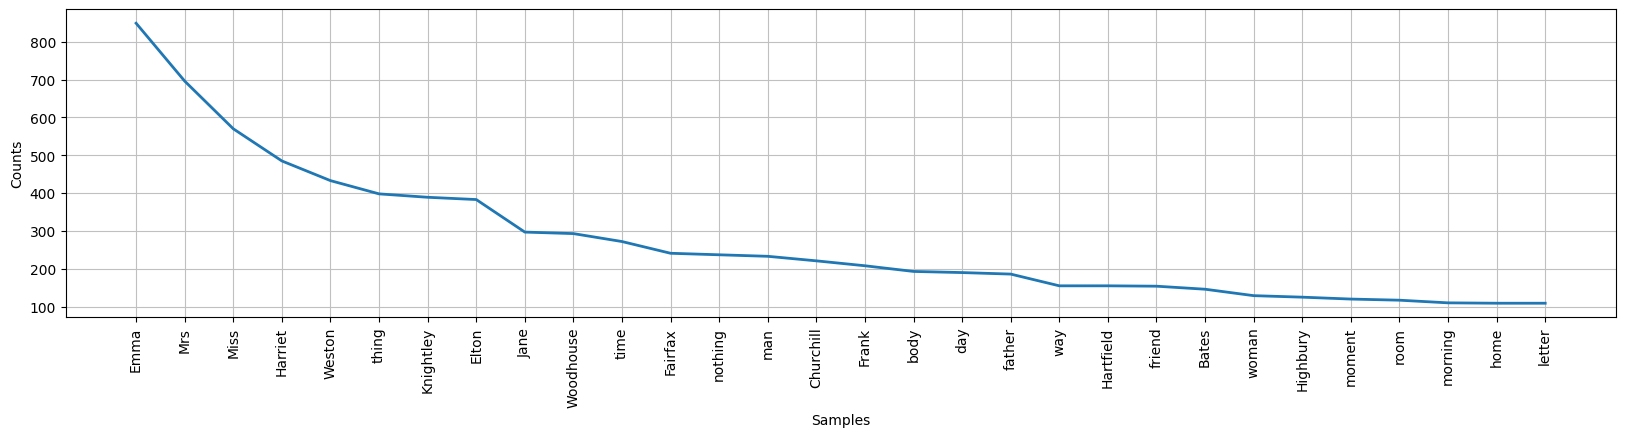

In [67]:
import matplotlib.pyplot as plt
from nltk import Text

# Text : 단어리스트와 관련된 빈도 분석이나 단어검색을 쉽게 할 수 있는 도구
plt.figure(figsize=(20,4))
emma_text = Text(nouns_list)
emma_text.plot(30)
plt.show()

In [60]:
emma_text.count('Emma')

849

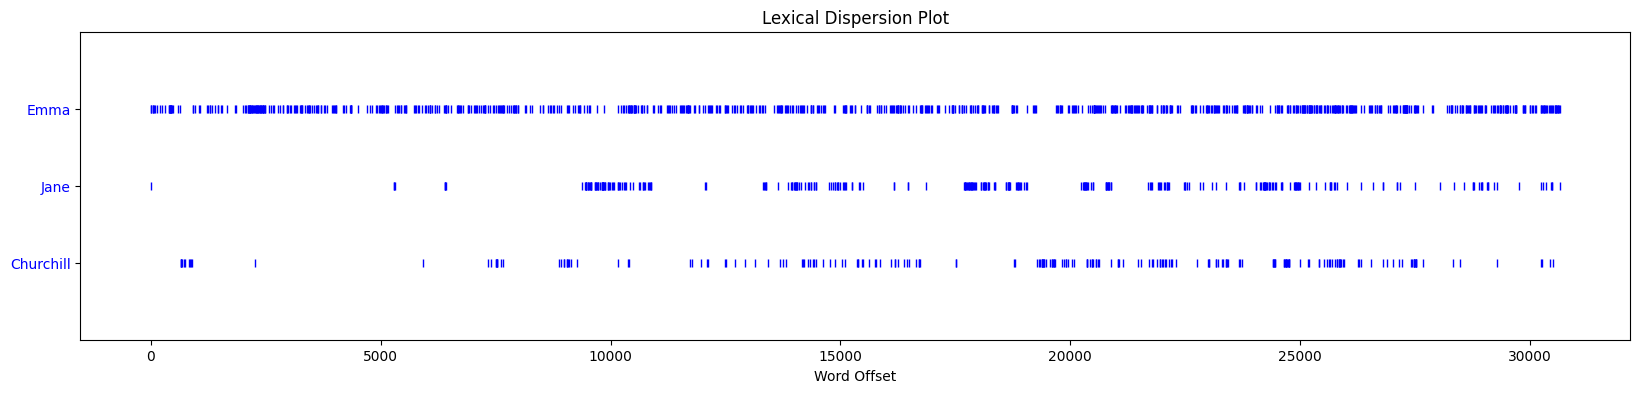

In [66]:
# 단어들이 텍스트 전체에서 어디에 나타나는지 시각적으로 보여주는 분산 그래프

plt.figure(figsize=(20,4))
emma_text.dispersion_plot(['Emma', 'Jane', 'Churchill'])

In [69]:
# 고유명사(이름) 출현 빈도

from nltk import FreqDist

name_list = [word for word, tag in tagged_list if tag.find('NNP') != -1]
name_wordcount = FreqDist(name_list)
name_wordcount

FreqDist({'Emma': 840, 'Mrs': 696, 'Miss': 569, 'Harriet': 484, 'Weston': 433, 'Knightley': 389, 'Elton': 382, 'Jane': 295, 'Woodhouse': 293, 'Fairfax': 241, ...})

In [71]:
# 150번 이상 등장되는 고유명사 추출

for name, freq in name_wordcount.items():
    if freq >= 150:
        print(name, ':', freq)

Emma : 840
Jane : 295
Woodhouse : 293
Miss : 569
Weston : 433
Mrs : 696
Hartfield : 155
Knightley : 389
Elton : 382
Churchill : 221
Frank : 208
Harriet : 484
Fairfax : 241


In [74]:
# 위의 내용을 sort

wordcnt = pd.Series(name_wordcount)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt[wordcnt>=150]

Emma         840
Mrs          696
Miss         569
Harriet      484
Weston       433
Knightley    389
Elton        382
Jane         295
Woodhouse    293
Fairfax      241
Churchill    221
Frank        208
Hartfield    155
dtype: int64